In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\ExcelR course\\Data science new\\assignments\\Decision Trees\\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


EDA

In [3]:
data.shape

(400, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


There is No Null Value.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Matrix

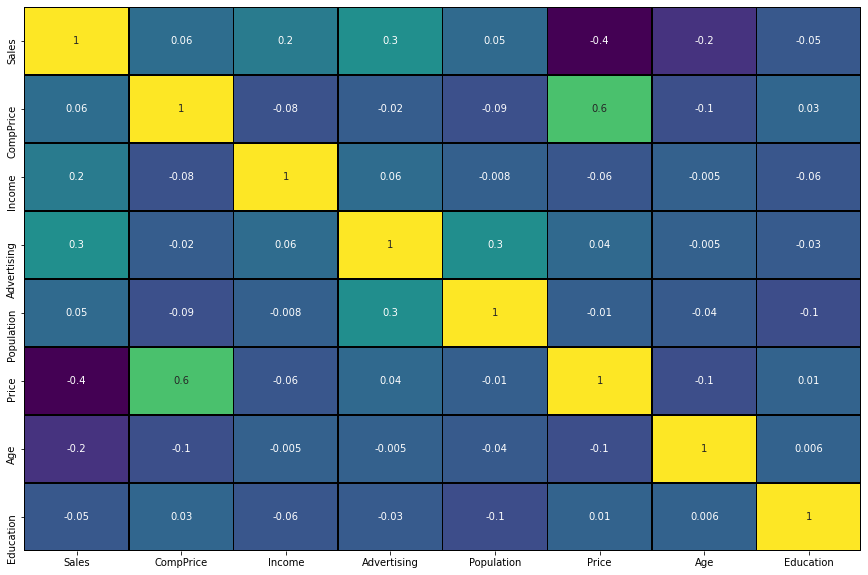

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

In [9]:
import warnings
warnings.filterwarnings("ignore")

Converting categorical data into numerical data for better understanding

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data['ShelveLoc'].unique(),data['Urban'].unique(),data['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [12]:
data["ShelveLoc"] = le.fit_transform(data["ShelveLoc"])

In [13]:
data["Urban"] = le.fit_transform(data["Urban"])

In [14]:
data["US"] = le.fit_transform(data["US"])

In [15]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [16]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [17]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

Categorizing sales to hugh, Medium, and Low sales

In [18]:
data.insert(11,'sales_category','')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [19]:
for i in range(0,len(data['Sales']),1):
    if data['Sales'][i]>=11.0:
        data["sales_category"][i]='high'
    elif data['Sales'][i]<=6.0:
        data['sales_category'][i]='Low'
    else:
        data['sales_category'][i]='Medium'

In [20]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [21]:
x=data.iloc[:,1:11]
y=data.iloc[:,11:12]

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [23]:
y

,sales_category
0,Medium
1,high
2,Medium
3,Medium
4,Low
...,...
395,high
396,Medium
397,Medium
398,Low


Model Training

In [24]:
x=data.iloc[:,1:11]
y=data.iloc[:,11:12]

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [26]:
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Low       0.83      0.65      0.73        31
      Medium       0.65      0.76      0.70        41
        high       0.25      0.25      0.25         8

    accuracy                           0.66        80
   macro avg       0.58      0.55      0.56        80
weighted avg       0.68      0.66      0.66        80



In [29]:
print(accuracy_score(y_test,y_pred))

0.6625


In [30]:
print(confusion_matrix(y_test,y_pred))

[[20 11  0]
 [ 4 31  6]
 [ 0  6  2]]


<AxesSubplot:>

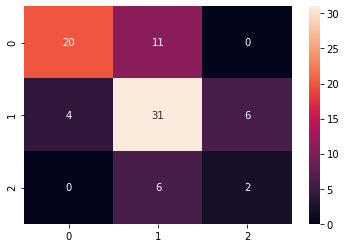

In [31]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

Building decision tree Classifier

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
from sklearn import tree

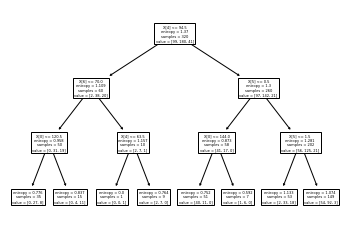

In [34]:
tree.plot_tree(model);

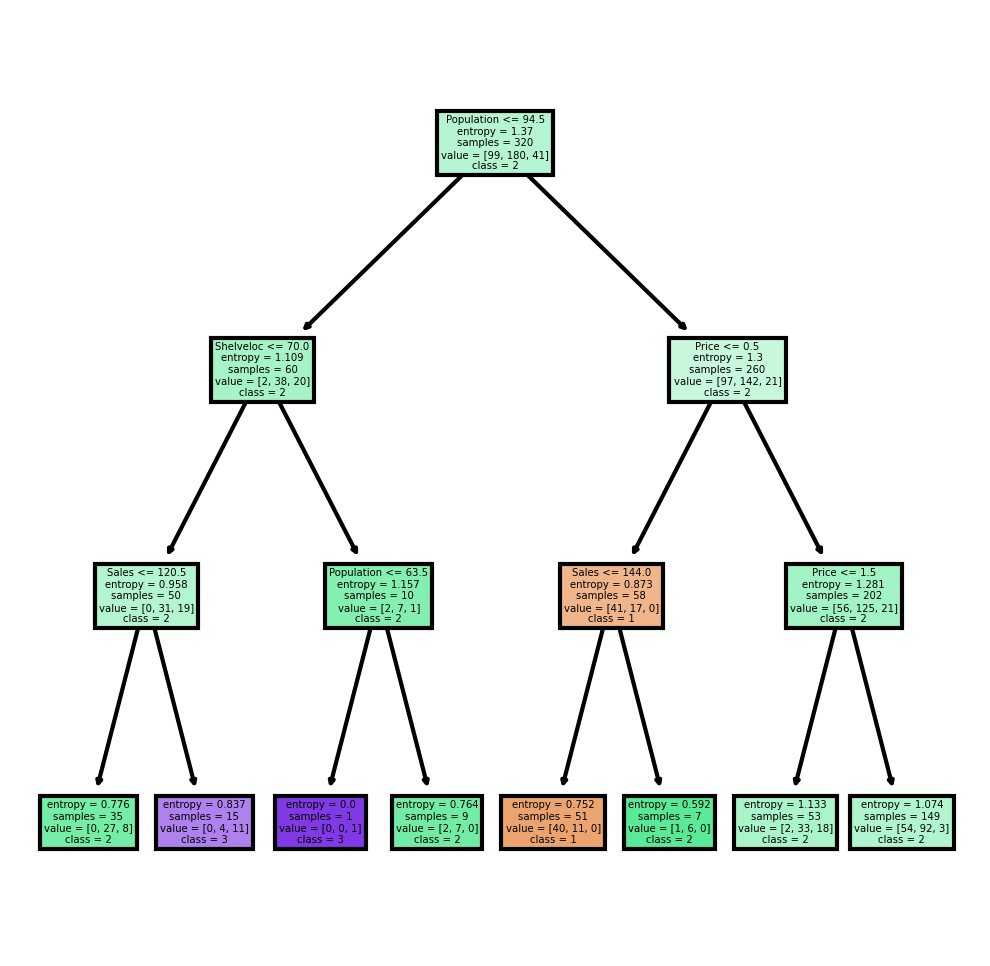

In [35]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Shelveloc','Age','Education','Urban','US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Feature Importance Plot

In [36]:
data['sales_category']=le.fit_transform(data['sales_category'])

In [37]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,2
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,2
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [38]:
x=data.iloc[:,1:11]
y=data.iloc[:,11:12]

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
model = DecisionTreeRegressor()

In [41]:
model.fit(x,y)

DecisionTreeRegressor()

Feature: 0, Score: 0.11300
Feature: 1, Score: 0.09930
Feature: 2, Score: 0.11739
Feature: 3, Score: 0.04380
Feature: 4, Score: 0.22997
Feature: 5, Score: 0.28184
Feature: 6, Score: 0.08321
Feature: 7, Score: 0.02680
Feature: 8, Score: 0.00469
Feature: 9, Score: 0.00000


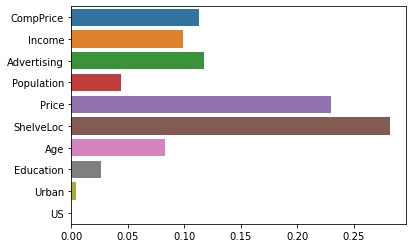

In [42]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %0.5f' % (i,v))

sns.barplot(x=importance,y=x.columns)
plt.show()

Here we can see some of the features donot contribute much for model building. And also the accuracy can be increased by dropping some of the features.
Here we take Shelveloc, Price, CompPrice, Age, Income and Advertising as these Features contibutes the most.

In [43]:
data_new = data.drop(["Sales","Population","US","Urban","Education"], axis=1)

In [44]:
data_new

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,sales_category
0,138,73,11,120,0,42,1
1,111,48,16,83,1,65,2
2,113,35,10,80,2,59,1
3,117,100,4,97,2,55,1
4,141,64,3,128,0,38,0
...,...,...,...,...,...,...,...
395,138,108,17,128,1,33,2
396,139,23,3,120,2,55,1
397,162,26,12,159,2,40,1
398,100,79,7,95,0,50,0


Model Building 

In [45]:
X = data_new.iloc[:,0:6]

In [46]:
X

,CompPrice,Income,Advertising,Price,ShelveLoc,Age
0,138,73,11,120,0,42
1,111,48,16,83,1,65
2,113,35,10,80,2,59
3,117,100,4,97,2,55
4,141,64,3,128,0,38
...,...,...,...,...,...,...
395,138,108,17,128,1,33
396,139,23,3,120,2,55
397,162,26,12,159,2,40
398,100,79,7,95,0,50


In [47]:
Y = data_new["sales_category"]

In [48]:
Y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    1
Name: sales_category, Length: 400, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Model Training

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model_new=DecisionTreeClassifier()

In [53]:
dt_model_new.fit(X_train,Y_train)
Y_pred=dt_model_new.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [56]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.69      0.66      0.68        41
           2       0.40      0.44      0.42         9

    accuracy                           0.68        80
   macro avg       0.61      0.62      0.62        80
weighted avg       0.68      0.68      0.68        80



In [59]:
print(accuracy_score(Y_test,Y_pred))

0.675


In [60]:
print(confusion_matrix(Y_test,Y_pred))

[[23  7  0]
 [ 8 27  6]
 [ 0  5  4]]


<AxesSubplot:>

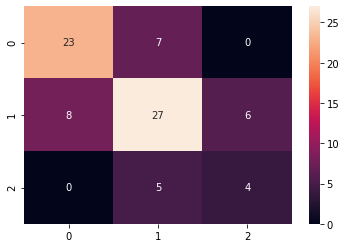

In [62]:
confusion_matrix_test=confusion_matrix(Y_test,Y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

Here the Accutracy Score is 0.675

Lets create a model by removing just US and Urban as it is the least influencing feature

In [66]:
data_new1 = data.drop(["Sales","US","Urban"], axis=1)

In [67]:
data_new1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sales_category
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,2
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,0
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,2
396,139,23,3,37,120,2,55,11,1
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,0


In [70]:
x = data_new1.iloc[:,0:8]

In [71]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


In [72]:
y=data_new1["sales_category"]

In [73]:
y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    1
Name: sales_category, Length: 400, dtype: int32

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_model_new1=DecisionTreeClassifier()

In [76]:
dt_model_new1.fit(x_train,y_train)
y_pred=dt_model_new1.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred)

0.7125

In [78]:
confusion_matrix(y_test,y_pred)

array([[20,  9,  0],
       [ 4, 32,  3],
       [ 0,  7,  5]], dtype=int64)

<AxesSubplot:>

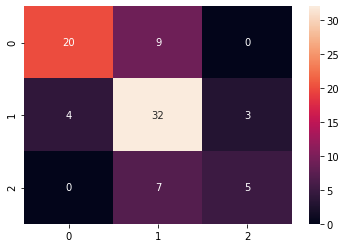

In [79]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

Here the model data_new1 has highest accuracy value.

In [87]:
model_new1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_new1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

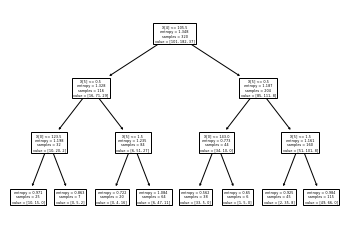

In [88]:
tree.plot_tree(model_new1);

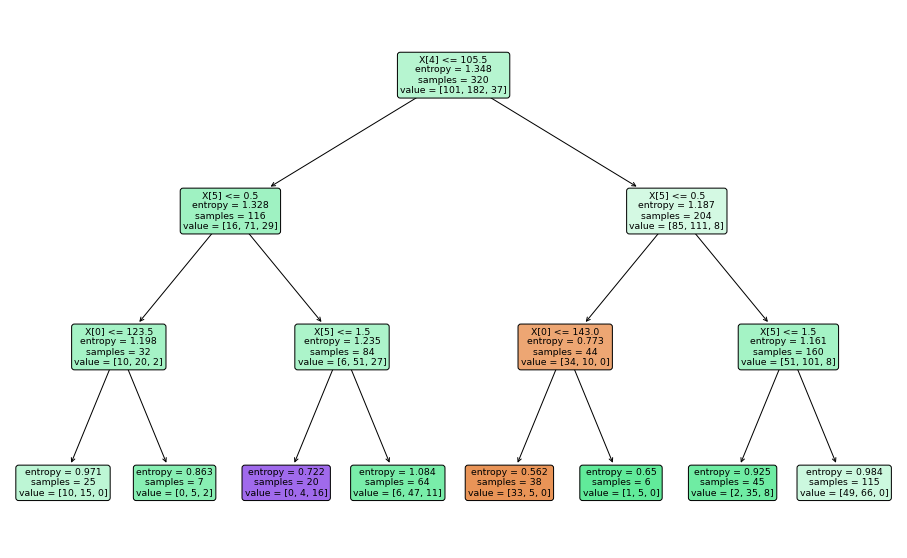

In [89]:
plt.figure(figsize=(16,10))
tree.plot_tree(model_new1,rounded=True,filled=True,max_depth=3)
plt.show()

Prediction

In [90]:
preds = model_new1.predict(x_test) 
pd.Series(preds).value_counts() 

1    60
0    15
2     5
dtype: int64

In [91]:
preds

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [92]:
pd.crosstab(y_test,preds)

col_0,0,1,2
sales_category,,,
0,14,15,0
1,1,36,2
2,0,9,3
